# Final Solution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
oo = pd.read_csv('../data/olympics.csv',skiprows=4)
oo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


### In every Olympics, which US athlete has won the most total number of medals? Include the athlete's discipline.

In [3]:
gy  = oo[oo.NOC == 'USA']
gy = gy.groupby(['Edition','Athlete','Medal']).size().unstack('Medal',fill_value=0)
gy['Total'] = gy['Gold'] + gy['Silver'] + gy['Bronze']
gy.reset_index(inplace=True)
tu = [group.sort_values('Total',ascending=False)[:1] for year,group in gy.groupby('Edition')]
tu
top = pd.DataFrame()
for i in tu:
    top = top.append(i)
top

Medal,Edition,Athlete,Bronze,Gold,Silver,Total
5,1896,"GARRETT, Robert",0,2,2,4
14,1900,"BAXTER, Irving",0,2,3,5
153,1904,"HEIDA, Anton",0,5,1,6
363,1908,"SHERIDAN, Martin",1,2,0,3
421,1912,"OSBURN, Carl Townsend",1,1,2,4
506,1920,"LEE, Willis",1,5,1,7
733,1924,"WEISSMULLER, Johnny",1,3,0,4
800,1928,"OSIPOWICH, Albina Lucy",0,2,0,2
859,1932,"DIDRIKSON, Mildred",0,2,1,3
1028,1936,"OWENS, Jesse",0,4,0,4


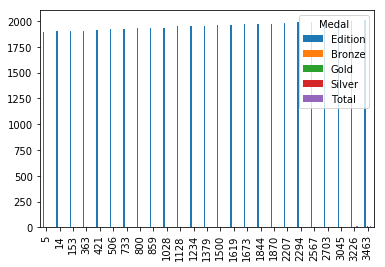

In [4]:
top.plot(kind='bar')

In [5]:
top.plot